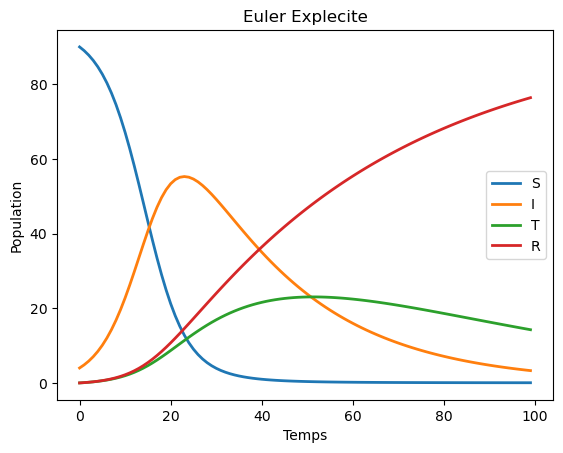

In [1]:
#eulerexplecite
import numpy as np
import matplotlib.pyplot as plt
import copy

#définition des fonctions S'(phiS) , I'(phiI) , T'(phiT) , R'(phiR)
def phiS(S,I,T,beta,delta,N):
   return (-beta/N) * (I + delta*T) * S


def phiI(S,I,T,alpha,beta,delta,gamma,N):
   return (beta/N) * S * (I + delta*T) - (alpha + gamma) * I


def phiT(I,T,alpha,eta):
   return alpha*I - eta*T


def phiR(I,T,gamma,eta):
   return gamma*I + eta*T


def EulerExplicite(alpha,beta,gamma,eta,delta,S0,I0,T0,h,epsilon,Nmax):

   t = np.arange(0, Nmax)
   
   i = 0
   S = [S0]
   I = [I0]
   T = [T0]
   R = [R0]


   while i < Nmax-1 :
       S.append(S[i]+h*phiS(S[i],I[i],T[i],beta,delta,N))
       I.append(I[i]+h*phiI(S[i],I[i],T[i],alpha,beta,delta,gamma,N))
       T.append(T[i]+h*phiT(I[i],T[i],alpha,eta))
       R.append(R[i]+h*phiR(I[i],T[i],gamma,eta))
       i = i+1
   
   return t,S,I,R,T




#Paramètres du modèle 
alpha = 0.1
beta = 1.3
gamma = 0.1
eta = 0.1
delta = 0.2


#Conditions initiales
S0 = 90.0
I0 = 4.0
T0 = 0.0
R0 = 0
R0i = (beta)/(alpha + gamma) + (alpha*delta*beta)/((alpha + gamma)*eta)


#Définition des autres constantes
N = S0 + I0 + T0 + R0
h = 0.2
epsilon = 1e-8
Nmax = 100






fig, ax = plt.subplots()
t,S,I,R,T = EulerExplicite(alpha,beta,gamma,eta,delta,S0,I0,T0,h,epsilon,Nmax)
line_S, = ax.plot(t,S,label="S", lw=2)
line_I, = ax.plot(t,I,label="I", lw=2)
line_T, = ax.plot(t,T,label="T", lw=2)
line_R, = ax.plot(t,R,label="R", lw=2)

#fig.subplots_adjust(left=0.15, bottom=0.55)
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Euler Explecite')
plt.legend()
plt.grid(False)
plt.show()
ax.legend()
plt.show()

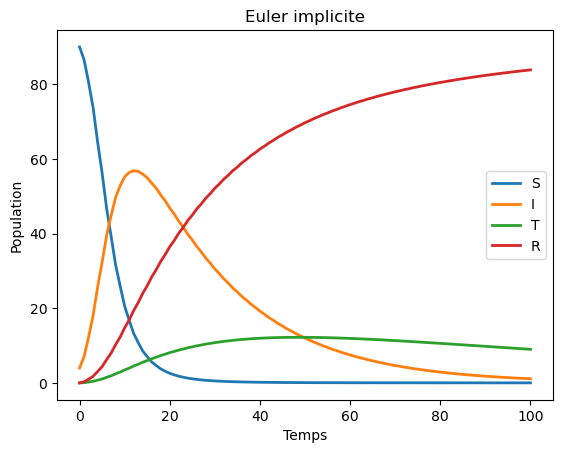

In [2]:
#euler iplicite
import numpy as np
import matplotlib.pyplot as plt
import copy

#définition des fonctions S'(phiS) , I'(phiI) , T'(phiT) , R'(phiR)
def phiS(beta,delta,N,S,I,T):
   return (-beta/N ) * ( I + delta*T) * S


def phiI(alpha,beta,delta,gamma,N,S,I,T):
   return (beta/N ) * S * ( I + delta*T) - (alpha + gamma) * I


def phiT(alpha,eta,I,T):
   return alpha*I - eta*T


def phiR(gamma,eta,I,T):
   return gamma*I + eta*T





def F(S, I, T, R, S_n, I_n, T_n, R_n,alpha, beta, delta, eta, gamma, N,h):
   FS = S - S_n - h * phiS(beta,delta,N,S,I,T)
   FI = I - I_n - h * phiI(alpha,beta,delta,gamma,N,S,I,T)
   FT = T - T_n - h * phiT(alpha,eta,I,T)
   FR = R - R_n - h * phiR(gamma,eta,I,T)
   return np.array([FS, FI, FT, FR])


# on calcule la jacobienne de F

def JacobSIRT(S,I,R,T,alpha,beta,delta,eta,gamma,N,h) :
   J = np.zeros((4,4))
   J[0, 0] = 1 + h * beta/N * (I + delta * T)
   J[0, 1] = h * beta/N * S
   J[0, 2] = h * beta/N * delta * S
   J[1, 0] = -h * beta/N * I
   J[1, 1] = 1 + h *(alpha + gamma - beta/N * S)
   J[1, 2] = -h * beta/N * delta
   J[2, 1] = -h * alpha
   J[2, 2] = 1 + h * eta
   J[3, 1] = -h * gamma
   J[3, 2] = -h * eta
   J[3, 3] = 1
   return J

#itération de Newton
def Newton(f, df, x0,S_n,I_n,T_n,R_n,alpha,beta,delta,eta,gamma,N,epsilon, Nmax,h):
   x=x0
   k=0
   while(k<Nmax):
         x=x-np.dot(np.linalg.inv(JacobSIRT(x[0],x[1],x[2],x[3],alpha,beta,delta,eta,gamma,N,h)), F(x[0],x[1],x[2],x[3], S_n, I_n, T_n, R_n,alpha, beta, delta, eta, gamma, N,h))
         k=k+1
   return x


def EulerImplicite(S_0,I_0,T_0,R_0,alpha,beta,delta,eta,gamma,N,h,epsilon,Nmax):
   t = np.arange(0,Nmax+1)
   S_1 = S_0 +h*phiS(beta,delta,N,S_0,I_0,T_0)
   I_1 = I_0 +h*phiI(alpha,beta,delta,gamma,N,S_0,I_0,T_0)
   T_1 = T_0 +h*phiT(alpha,eta,I_0,T_0)
   R_1 = R_0 +h*phiR(gamma,eta,I_0,T_0)
   S = [S_0,S_1]
   I = [I_0,I_1]
   T = [T_0,T_1]
   R = [R_0,R_1]
   i = 1
   for k in range(1,Nmax):
       x0 = [S[k], I[k], T[k], R[k]] #les valeur de Sn,In,Tn,Rn
       x00 = [S[k-1], I[k-1], T[k-1], R[k-1]]#les valeur de Sn-1,In-1,Tn-1,Rn-1
       f = F(x0[0], x0[1], x0[2], x0[3], x00[0], x00[1], x00[2], x00[3], alpha, beta, delta, eta, gamma, N,h)#calcul de F correspondante 
       df = JacobSIRT(x0[0], x0[1], x0[2], x0[3], alpha, beta, delta, eta, gamma, N,h)#calcul de la jacobienne de f
       solution = Newton(f, df, x0,x00[0],x00[1],x00[2],x00[3],alpha,beta,delta,eta,gamma,N,epsilon, Nmax,h)
       S.append(solution[0])
       I.append(solution[1])
       T.append(solution[2])
       R.append(solution[3])
   return t,S,I,T,R


beta_0 = 4.5
delta_0 = 0.2   
gamma_0 = 0.4   
alpha_0 = 0.1 
eta_0 = 0.1  
S0_0 = 90
I0_0 = 4
T0_0 = 0
R0_0 = 0
N = S0_0 + I0_0 + T0_0 + R0_0
h = 0.2
epsilon = 1e-8
Nmax = 100
R0i = (beta_0)/(alpha_0 + gamma_0) + (alpha_0*delta_0*beta_0)/((alpha_0 + gamma_0)*eta_0)

figure, ax = plt.subplots()
t,S,I,T,R = EulerImplicite(S0_0,I0_0,T0_0,R0_0,alpha_0,beta_0,delta_0,eta_0,gamma_0,N,h,epsilon,Nmax)
line_S, = ax.plot(t,S,label="S", lw=2)
line_I, = ax.plot(t,I,label="I", lw=2)
line_T, = ax.plot(t,T,label="T", lw=2)
line_R, = ax.plot(t,R,label="R", lw=2)




plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Euler implicite')
plt.legend()
plt.grid(False)
plt.show()
ax.legend()
plt.show()


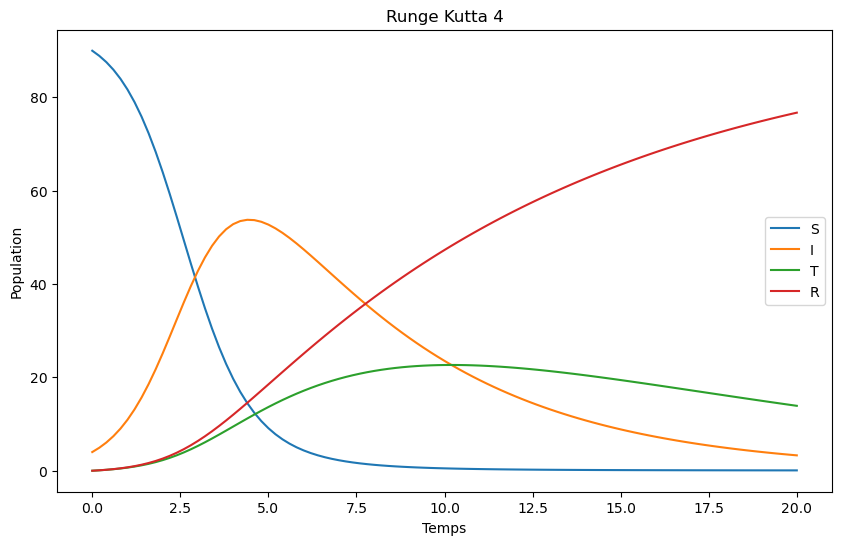

In [3]:
#kutta
import numpy as np
import matplotlib.pyplot as plt



# Définition des fonctions pour les équations différentielles
def phiS(S,I,T,beta,delta,N):
    return (-beta/N) * (I + delta*T) * S

def phiI(S,I,T,alpha,beta,delta,gamma,N):
    return (beta/N) * S * (I + delta*T) - (alpha + gamma) * I

def phiT(I,T,alpha,eta):
    return alpha*I - eta*T

def phiR(I,T,gamma,eta):
    return gamma*I + eta*T

def runge_kutta_4_initiale(t, y, h, beta, delta, alpha, gamma, eta, N):
    # Calcule une seule étape de la méthode de Runge-Kutta d'ordre 4

    k1_S = h * phiS(y[0], y[1], y[2], beta, delta, N)
    k1_I = h * phiI(y[0], y[1], y[2], alpha, beta, delta, gamma, N)
    k1_T = h * phiT(y[1], y[2], alpha, eta)
    k1_R = h * phiR(y[1], y[2], gamma, eta)

    k2_S = h * phiS(y[0] + 0.5*k1_S, y[1] + 0.5*k1_I, y[2] + 0.5*k1_T, beta, delta, N)
    k2_I = h * phiI(y[0] + 0.5*k1_S, y[1] + 0.5*k1_I, y[2] + 0.5*k1_T, alpha, beta, delta, gamma, N)
    k2_T = h * phiT(y[1] + 0.5*k1_I, y[2] + 0.5*k1_T, alpha, eta)
    k2_R = h * phiR(y[1] + 0.5*k1_I, y[2] + 0.5*k1_T, gamma, eta)

    k3_S = h * phiS(y[0] + 0.5*k2_S, y[1] + 0.5*k2_I, y[2] + 0.5*k2_T, beta, delta, N)
    k3_I = h * phiI(y[0] + 0.5*k2_S, y[1] + 0.5*k2_I, y[2] + 0.5*k2_T, alpha, beta, delta, gamma, N)
    k3_T = h * phiT(y[1] + 0.5*k2_I, y[2] + 0.5*k2_T, alpha, eta)
    k3_R = h * phiR(y[1] + 0.5*k2_I, y[2] + 0.5*k2_T, gamma, eta)

    k4_S = h * phiS(y[0] + k3_S, y[1] + k3_I, y[2] + k3_T, beta, delta, N)
    k4_I = h * phiI(y[0] + k3_S, y[1] + k3_I, y[2] + k3_T, alpha, beta, delta, gamma, N)
    k4_T = h * phiT(y[1] + k3_I, y[2] + k3_T, alpha, eta)
    k4_R = h * phiR(y[1] + k3_I, y[2] + k3_T, gamma, eta)

    # Mise à jour des valeurs
    y[0] += (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
    y[1] += (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
    y[2] += (k1_T + 2*k2_T + 2*k3_T + k4_T) / 6
    y[3] += (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return y

def runge_kutta_4(t0, y0, h, beta, delta, alpha, gamma, eta, Nmax, epsilon, N):

    t = t0
    y = y0.copy()
    
    S_values = [y[0]]
    I_values = [y[1]]
    T_values = [y[2]]
    R_values = [y[3]]
    t_values = [t]

    for i in range(Nmax):
        y_old = y.copy()
        y = runge_kutta_4_initiale(t, y, h, beta, delta, alpha, gamma, eta, N)
        t += h

        # Condition d'arrêt
        if np.linalg.norm(y - y_old) < epsilon:
            break

        # Sauvegarde des valeurs
        S_values.append(y[0])
        I_values.append(y[1])
        T_values.append(y[2])
        R_values.append(y[3])
        t_values.append(t)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, S_values, label='S')
    plt.plot(t_values, I_values, label='I')
    plt.plot(t_values, T_values, label='T')
    plt.plot(t_values, R_values, label='R')
    plt.xlabel('Temps')
    plt.ylabel('Population')
    plt.title('Runge Kutta 4')
    plt.legend()
    plt.grid(False)
    plt.show()




# Paramètres du modèle
alpha = 0.1
beta = 1.3
gamma = 0.1
eta = 0.1
delta = 0.2

# Conditions initiales
S0 = 90.0
I0 = 4.0
T0 = 0.0
R0 = 0.0
R0i = (beta)/(alpha + gamma) + (alpha*delta*beta)/((alpha + gamma)*eta)

# Autres constantes
N = S0 + I0 + T0 + R0
h = 0.2
epsilon = 1e-8
Nmax = 100
# Conditions initiales
t0 = 0
y0 = np.array([S0, I0, T0, R0])

# Appel de la fonction Runge-Kutta
runge_kutta_4(t0, y0, h, beta, delta, alpha, gamma, eta, Nmax, epsilon, N)
